In [159]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [150]:
df = pd.read_csv('houses.csv')
df
%matplotlib inline

In [105]:
reg = linear_model.LinearRegression()

In [106]:
#Predict construction costs based on size
df_size = df.drop(['title', 'house_type', 'price', 'construction_costs'],axis='columns')

reg.fit(df_size, df.construction_costs)
reg.predict([[1250]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2047742.99307738])

In [107]:
#Predict plan price based on house size
df_size = df.drop(['title', 'house_type', 'price', 'construction_costs'],axis='columns')

reg.fit(df_size, df.price)
reg.predict([[50]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2919.80176008])

In [108]:
#Linear Regression Multiple Variables
reg.fit(df[['size', 'price']], df.construction_costs)

LinearRegression()

In [109]:
reg.coef_

array([831.30959148,  72.82944466])

In [110]:
reg.intercept_

-121121.66942455215

In [111]:
#Construction costs prediction based on plan price and house size
reg.predict([[250, 5500]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([487267.67409073])

In [115]:
with open('model_pickle', 'wb') as f:
    pickle.dump(reg, f)

In [116]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [83]:
#Dummy Variables and One Hot Encoding

In [118]:
dummies = pd.get_dummies(df.house_type)
dummies

,Domek letniskowy parterowy,Domek letniskowy z poddaszem,jednorodzinny parterowy,"jednorodzinny parterowy, z garażem jednostanowiskowym","jednorodzinny parterowy, z garażem jednostanowiskowym, ze stropem teriva",jednorodzinny piętrowy,"jednorodzinny piętrowy, z garażem jednostanowiskowym",jednorodzinny z poddaszem,"jednorodzinny z poddaszem, z garażem dwustanowiskowym","jednorodzinny z poddaszem, z garażem jednostanowiskowym","jednorodzinny z poddaszem, z garażem jednostanowiskowym, ze stropem teriva","jednorodzinny z poddaszem, z piwnicą","jednorodzinny z poddaszem, ze stropem teriva"
0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,0,0,0,0,0,0,0,0,0,1,0,0,0
732,0,0,0,0,0,0,0,0,0,1,0,0,0
733,0,0,0,1,0,0,0,0,0,0,0,0,0
734,0,0,0,0,0,0,0,0,0,1,0,0,0


In [119]:
merged = pd.concat([df, dummies], axis = 'columns')
merged

,title,house_type,price,size,construction_costs,Domek letniskowy parterowy,Domek letniskowy z poddaszem,jednorodzinny parterowy,"jednorodzinny parterowy, z garażem jednostanowiskowym","jednorodzinny parterowy, z garażem jednostanowiskowym, ze stropem teriva",jednorodzinny piętrowy,"jednorodzinny piętrowy, z garażem jednostanowiskowym",jednorodzinny z poddaszem,"jednorodzinny z poddaszem, z garażem dwustanowiskowym","jednorodzinny z poddaszem, z garażem jednostanowiskowym","jednorodzinny z poddaszem, z garażem jednostanowiskowym, ze stropem teriva","jednorodzinny z poddaszem, z piwnicą","jednorodzinny z poddaszem, ze stropem teriva"
0,Dom w papawerach 2,"jednorodzinny z poddaszem, z garażem jednostan...",3930,128,331800,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Domek letniskowy w krokusach 4 (A),Domek letniskowy parterowy,2300,25,74400,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Domek letniskowy w krokusach 5,Domek letniskowy parterowy,2300,25,83500,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Domek letniskowy w krokusach 4,Domek letniskowy parterowy,2300,36,95300,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Domek letniskowy pod laskiem,Domek letniskowy parterowy,2300,38,96800,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,Dom w firletkach,"jednorodzinny z poddaszem, z garażem jednostan...",3930,137,278600,0,0,0,0,0,0,0,0,0,1,0,0,0
732,Dom w zdrojówkach 12,"jednorodzinny z poddaszem, z garażem jednostan...",3930,129,278700,0,0,0,0,0,0,0,0,0,1,0,0,0
733,Dom w renklodach 26 (G),"jednorodzinny parterowy, z garażem jednostanow...",3600,140,279000,0,0,0,1,0,0,0,0,0,0,0,0,0
734,Dom w balsamowcach (A),"jednorodzinny z poddaszem, z garażem jednostan...",3930,124,279200,0,0,0,0,0,0,0,0,0,1,0,0,0


In [120]:
final = merged.drop(['title', 'house_type',
       'Domek letniskowy parterowy', 'Domek letniskowy z poddaszem',
       'jednorodzinny parterowy, z garażem jednostanowiskowym',
       'jednorodzinny parterowy, z garażem jednostanowiskowym, ze stropem teriva',
       'jednorodzinny piętrowy, z garażem jednostanowiskowym',
       'jednorodzinny z poddaszem, z garażem dwustanowiskowym',
       'jednorodzinny z poddaszem, z garażem jednostanowiskowym',
       'jednorodzinny z poddaszem, z garażem jednostanowiskowym, ze stropem teriva',
       'jednorodzinny z poddaszem, z piwnicą',
       'jednorodzinny piętrowy',               
       'jednorodzinny z poddaszem, ze stropem teriva'], axis = 1)
final

,price,size,construction_costs,jednorodzinny parterowy,jednorodzinny z poddaszem
0,3930,128,331800,0,0
1,2300,25,74400,0,0
2,2300,25,83500,0,0
3,2300,36,95300,0,0
4,2300,38,96800,0,0
...,...,...,...,...,...
731,3930,137,278600,0,0
732,3930,129,278700,0,0
733,3600,140,279000,0,0
734,3930,124,279200,0,0


In [124]:
model = LinearRegression()
X = final.drop(['price', 'construction_costs'], axis = 'columns')
X

,size,jednorodzinny parterowy,jednorodzinny z poddaszem
0,128,0,0
1,25,0,0
2,25,0,0
3,36,0,0
4,38,0,0
...,...,...,...
731,137,0,0
732,129,0,0
733,140,0,0
734,124,0,0


In [126]:
y = final.price
y

0      3930
1      2300
2      2300
3      2300
4      2300
       ... 
731    3930
732    3930
733    3600
734    3930
735    3930
Name: price, Length: 736, dtype: int64

In [127]:
#Training a machine learning model
model.fit(X, y)

LinearRegression()

In [133]:
#House plan prediction based on area and house_type
model.predict([[250, 1, 0]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4878.19165317])

In [134]:
model.score(X,y)

0.6505388374520567

In [147]:
le = LabelEncoder()
ohe = OneHotEncoder()

In [144]:
df_le = df
df_le.house_type = le.fit_transform(df_le.house_type)
df_le

,title,house_type,price,size,construction_costs
0,Dom w papawerach 2,9,3930,128,331800
1,Domek letniskowy w krokusach 4 (A),0,2300,25,74400
2,Domek letniskowy w krokusach 5,0,2300,25,83500
3,Domek letniskowy w krokusach 4,0,2300,36,95300
4,Domek letniskowy pod laskiem,0,2300,38,96800
...,...,...,...,...,...
731,Dom w firletkach,9,3930,137,278600
732,Dom w zdrojówkach 12,9,3930,129,278700
733,Dom w renklodach 26 (G),3,3600,140,279000
734,Dom w balsamowcach (A),9,3930,124,279200


In [145]:
X = df[['house_type', 'price']].values
X

array([[   9, 3930],
       [   0, 2300],
       [   0, 2300],
       ...,
       [   3, 3600],
       [   9, 3930],
       [   9, 3930]])

In [148]:
ohe.fit_transform(X)

<736x23 sparse matrix of type '<class 'numpy.float64'>'
	with 1472 stored elements in Compressed Sparse Row format>

In [ ]:
#Data visualization

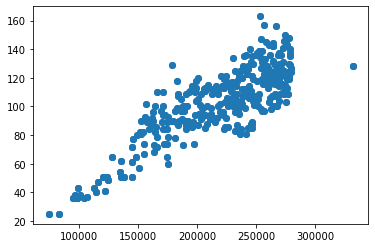

In [155]:
plt.scatter(df['construction_costs'], df['size'])

In [156]:
x = df[['size', 'price']]
y = df['construction_costs']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [182]:
clf = LinearRegression()

In [183]:
clf.fit(X_train, y_train)

LinearRegression()

In [184]:
clf.predict(X_test)

array([156930.63805525, 271276.97153277, 272687.14831595, 272687.14831595,
       233204.54398499, 196669.78032244, 142830.43395553, 233204.54398499,
       238845.25111772, 272687.14831595, 233204.54398499, 238845.25111772,
       230384.19041862,  76427.76550808, 230384.19041862, 210771.54815428,
       272687.14831595, 145650.7875219 , 272687.14831595, 233204.54398499,
       230384.19041862,  76427.76550808, 230384.19041862, 230384.19041862,
       172442.58267027, 230384.19041862, 142830.43395553, 230384.19041862,
       238845.25111772, 203720.66423836, 210771.54815428, 135779.55003962,
       210771.54815428, 272687.14831595, 230384.19041862, 272687.14831595,
       272687.14831595, 203720.66423836, 203720.66423836, 230384.19041862,
       145650.7875219 , 142830.43395553, 203720.66423836, 230384.19041862,
       238845.25111772, 230384.19041862, 275507.50188232, 272687.14831595,
       276917.6786655 , 196669.78032244, 163981.52197117, 142830.43395553,
       230384.19041862, 2

In [185]:
y_test

90     149100
701    273800
710    276400
604    261400
331    217500
        ...  
720    279000
81     134700
70     106700
392    230800
668    270600
Name: construction_costs, Length: 148, dtype: int64

In [186]:
#Accuracy
clf.score(X_test, y_test)

0.7709895653472704